In [4]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../dataset/ab-test.csv')
df

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test
5,user_19,-148.000000,before,test
6,user_21,-78.500000,after,test
7,user_21,-112.500000,before,test
8,user_25,-127.500000,after,test
9,user_25,-69.333333,before,test


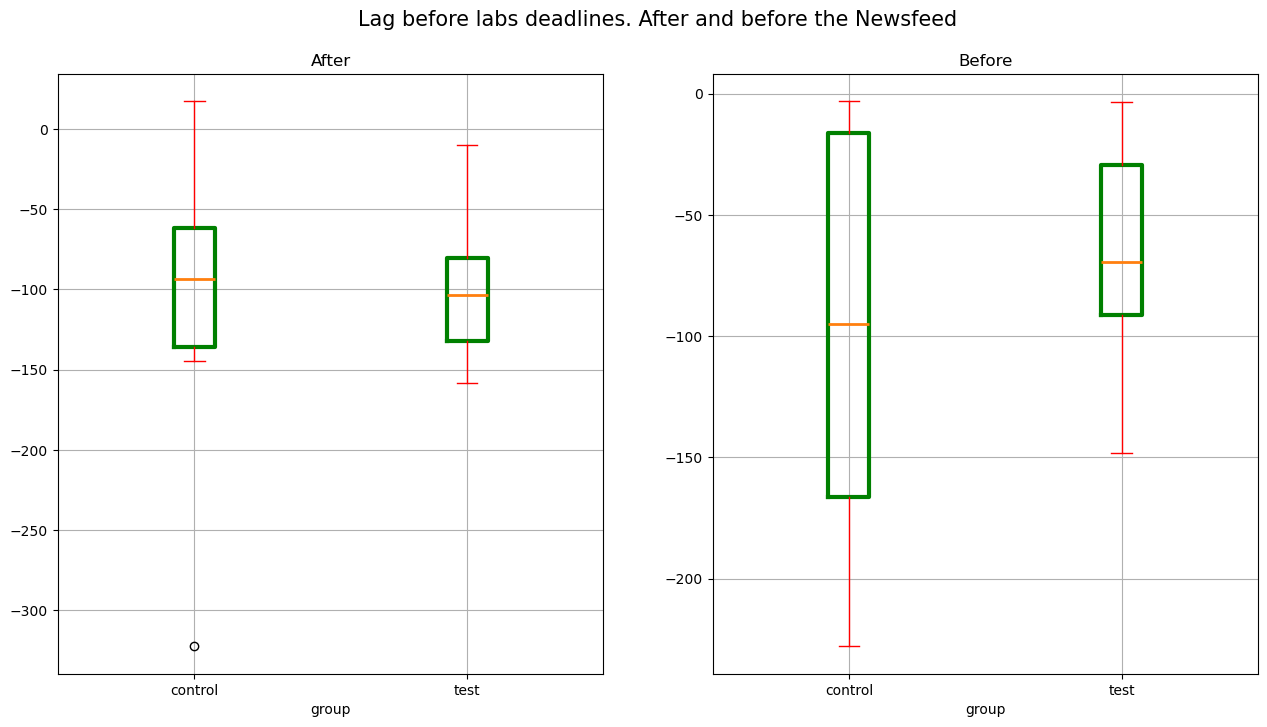

In [6]:
# Функция для построения боксплотов
def create_boxplot(df_subset, ax, title):
    df_subset.boxplot(column='diff', by='group', ax=ax,
                      color=dict(whiskers='red', medians='red', caps='red'),
                      boxprops=dict(color='green', linewidth=3),
                      medianprops=dict(linewidth=2))
    ax.set_title(title)
    
# Создаем фигуру и оси
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Строим боксплоты для 'after' и 'before'
create_boxplot(df.query("time == 'after'"), axes[0], 'After')
create_boxplot(df.query("time == 'before'"), axes[1], 'Before')

# Устанавливаем общий заголовок
fig.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)

plt.show()

<h2>«Каково было межквартильное расстояние (IQR) контрольной группы до показа новостей?»</h2>

<h2>IQR (Interquartile Range) - это межквартильный размах, который представляет собой разницу между третьим и первым квартилями.</h2>

До появления ленты новостей IQR был равен примерно 80, а после примерно 140. Это говорит нам **о увеличении разброса данных**: Межквартильный размах показывает, насколько сильно различаются средние 50% наблюдений в наборе данных. Увеличение IQR говорит о том, что разброс этих средних 50% данных увеличился. То есть, данные стали более разнообразными или рассеянными.